In [1]:
import pandas as pnd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson  
from scipy.interpolate import *
import seaborn as sns

In [2]:
matches = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\matches.csv')
matches.head()

,match_awayteam_id,match_hometeam_id,match_id,epoch,match_status,match_live,match_hometeam_name,match_awayteam_name,match_hometeam_score,match_awayteam_score,match_hometeam_halftime_score,match_awayteam_halftime_score,match_hometeam_extra_score,match_awayteam_extra_score,match_hometeam_penalty_score,match_awayteam_penalty_score,league_id
0,7109,7097,41196,1505559600,Finished,0,Levante,Valencia,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,468
1,2614,2619,13331,1505561400,Finished,0,Crystal Palace,Southampton,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,148
2,3224,3238,17683,1505568600,Finished,0,Eintracht Frankfurt,FC Augsburg,1.0,2.0,0.0,1.0,0.0,1.0,NaN,NaN,195
3,3235,3223,17684,1505568600,Finished,0,SV Werder Bremen,Schalke,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,195
4,3237,3225,17682,1505568600,Finished,0,Bayern Munich,1. FSV Mainz 05,4.0,0.0,2.0,0.0,2.0,0.0,NaN,NaN,195


In [3]:
LEAGUE_ID = 148
finished_matches = matches[matches.match_status == 'Finished']
english_finish_matches = finished_matches[finished_matches.league_id == LEAGUE_ID]
english_finish_matches.drop_duplicates(subset='match_id', keep='first')
english_finish_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 1 to 5059
Data columns (total 17 columns):
match_awayteam_id                618 non-null int64
match_hometeam_id                618 non-null int64
match_id                         618 non-null int64
epoch                            618 non-null int64
match_status                     618 non-null object
match_live                       618 non-null int64
match_hometeam_name              618 non-null object
match_awayteam_name              618 non-null object
match_hometeam_score             618 non-null float64
match_awayteam_score             618 non-null float64
match_hometeam_halftime_score    569 non-null float64
match_awayteam_halftime_score    569 non-null float64
match_hometeam_extra_score       569 non-null float64
match_awayteam_extra_score       569 non-null float64
match_hometeam_penalty_score     0 non-null float64
match_awayteam_penalty_score     0 non-null float64
league_id                        618 non-null i

In [4]:
hometeam_score = english_finish_matches.match_hometeam_score
hometeam_score_mean = np.mean(hometeam_score)

awayteam_score = english_finish_matches.match_awayteam_score
awayteam_score_mean = np.mean(awayteam_score)

home_away_score = english_finish_matches.match_hometeam_score- english_finish_matches.match_awayteam_score



# Task 1

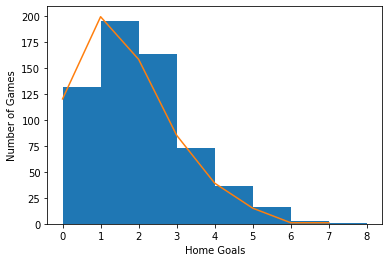

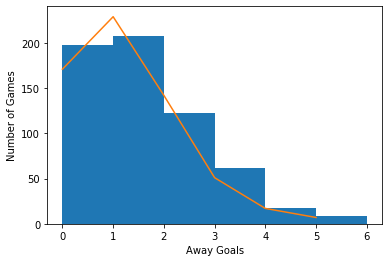

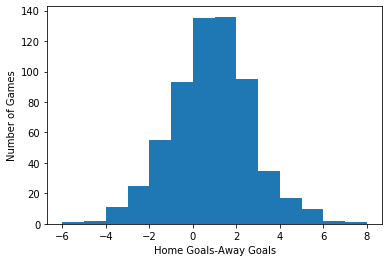

In [5]:
bin = int(max(hometeam_score))
range_min = int(min(hometeam_score)) 
plt.hist(hometeam_score,bins=bin)
poissonpmf = np.histogram(np.random.poisson(lam = hometeam_score_mean, size = hometeam_score.size),bins=bin,range=(range_min,bin))
plt.plot(poissonpmf[0])
plt.xlabel('Home Goals')
plt.ylabel('Number of Games')
plt.show()


bin2 = int(max(awayteam_score))
range_min2 = int(min(awayteam_score)) 
plt.hist(awayteam_score,bins=bin2)
poisson_pmf2 = np.histogram(np.random.poisson(lam = awayteam_score_mean, size = awayteam_score.size),bins=bin2,range=(range_min2,bin2))
plt.plot(poisson_pmf2[0])
plt.xlabel('Away Goals')
plt.ylabel('Number of Games')
plt.show()

bin3 = int(max(home_away_score)) - int(min(home_away_score))
plt.hist(home_away_score,bins=bin3)
plt.xlabel('Home Goals-Away Goals')
plt.ylabel('Number of Games')
plt.show()


# Task 2

In [6]:
bets = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\bets.csv')
bets_matches = pnd.merge(bets,english_finish_matches[['match_id','match_hometeam_score','match_awayteam_score']], on='match_id', how='inner')
 
bets_bookmaker = ['1xBet','Tempobet','Betsson','Tipico']
bets_variable = ['odd_1','odd_x','odd_2']

bets_matches_bookmaker = bets_matches[bets_matches.odd_bookmakers.isin(bets_bookmaker)]  

bets_data = bets_matches_bookmaker[bets_matches_bookmaker.variable.isin(bets_variable)]
bets_data = bets_data.loc[bets_data.groupby(['match_id','odd_bookmakers','variable'])['odd_epoch'].agg(pnd.Series.idxmax)]
bets_data_pivot_unfiltered = pnd.pivot_table(bets_data,index=['match_id','odd_bookmakers','odd_epoch'] ,columns='variable',values='value').reset_index()

bets_data_pivot1= bets_data_pivot_unfiltered[(bets_data_pivot_unfiltered.odd_1>=1.00)] 
bets_data_pivot2=bets_data_pivot1[(bets_data_pivot1.odd_2>=1.00)]
bets_data_pivot=bets_data_pivot2[(bets_data_pivot2.odd_x>=1.00)]

bets_data_pivot['P(home win)'] = 1/bets_data_pivot['odd_1']
bets_data_pivot['P(away win)'] = 1/bets_data_pivot['odd_2']   
bets_data_pivot['P(tie)'] = 1/bets_data_pivot['odd_x']    
bets_data_pivot.dropna()
bets_data_pivot.drop_duplicates(subset=['match_id','odd_epoch','odd_bookmakers'], keep='first')
bets_data_pivot = pnd.merge(bets_data_pivot,english_finish_matches[['match_id','match_hometeam_score','match_awayteam_score']], on='match_id', how='left')
bets_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Data columns (total 11 columns):
match_id                756 non-null int64
odd_bookmakers          756 non-null object
odd_epoch               756 non-null int64
odd_1                   756 non-null float64
odd_2                   756 non-null float64
odd_x                   756 non-null float64
P(home win)             756 non-null float64
P(away win)             756 non-null float64
P(tie)                  756 non-null float64
match_hometeam_score    756 non-null float64
match_awayteam_score    756 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 70.9+ KB


In [7]:
bets_data_pivot['Normalization_Value'] = (bets_data_pivot['P(home win)']+bets_data_pivot['P(away win)']+bets_data_pivot['P(tie)'])

bets_data_pivot['P(home win)_Normalized']=bets_data_pivot['P(home win)']/bets_data_pivot['Normalization_Value']
bets_data_pivot['P(away win)_Normalized']=bets_data_pivot['P(away win)']/bets_data_pivot['Normalization_Value']
bets_data_pivot['P(tie)_Normalized']=bets_data_pivot['P(tie)']/bets_data_pivot['Normalization_Value']

bets_data_pivot.head()

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,P(home win),P(away win),P(tie),match_hometeam_score,match_awayteam_score,Normalization_Value,P(home win)_Normalized,P(away win)_Normalized,P(tie)_Normalized
0,150842,1xBet,1486711421,5.10,1.77,3.7,0.196078,0.564972,0.270270,0.0,0.0,1.031320,0.190124,0.547814,0.262062
1,150844,1xBet,1486711426,3.09,2.46,3.3,0.323625,0.406504,0.303030,3.0,1.0,1.033159,0.313238,0.393457,0.293305
2,156845,1xBet,1489826601,2.40,3.54,3.1,0.416667,0.282486,0.322581,2.0,0.0,1.021733,0.407804,0.276477,0.315719
3,156845,Tempobet,1489826601,2.35,3.20,2.9,0.425532,0.312500,0.344828,2.0,0.0,1.082860,0.392971,0.288588,0.318442
4,156845,Tipico,1489826601,2.20,3.10,2.9,0.454545,0.322581,0.344828,2.0,0.0,1.121954,0.405137,0.287517,0.307346


In [8]:
bets_data_pivot["P(home win) - P(away win)"]=bets_data_pivot['P(home win)']-bets_data_pivot['P(away win)']
bets_data_pivot["P(home win)_Normalized - P(away win)_Normalized"]=bets_data_pivot['P(home win)_Normalized']-bets_data_pivot['P(away win)_Normalized']
bets_data_pivot.head()

,match_id,odd_bookmakers,odd_epoch,odd_1,odd_2,odd_x,P(home win),P(away win),P(tie),match_hometeam_score,match_awayteam_score,Normalization_Value,P(home win)_Normalized,P(away win)_Normalized,P(tie)_Normalized,P(home win) - P(away win),P(home win)_Normalized - P(away win)_Normalized
0,150842,1xBet,1486711421,5.10,1.77,3.7,0.196078,0.564972,0.270270,0.0,0.0,1.031320,0.190124,0.547814,0.262062,-0.368893,-0.357690
1,150844,1xBet,1486711426,3.09,2.46,3.3,0.323625,0.406504,0.303030,3.0,1.0,1.033159,0.313238,0.393457,0.293305,-0.082879,-0.080219
2,156845,1xBet,1489826601,2.40,3.54,3.1,0.416667,0.282486,0.322581,2.0,0.0,1.021733,0.407804,0.276477,0.315719,0.134181,0.131327
3,156845,Tempobet,1489826601,2.35,3.20,2.9,0.425532,0.312500,0.344828,2.0,0.0,1.082860,0.392971,0.288588,0.318442,0.113032,0.104383
4,156845,Tipico,1489826601,2.20,3.10,2.9,0.454545,0.322581,0.344828,2.0,0.0,1.121954,0.405137,0.287517,0.307346,0.131965,0.117621


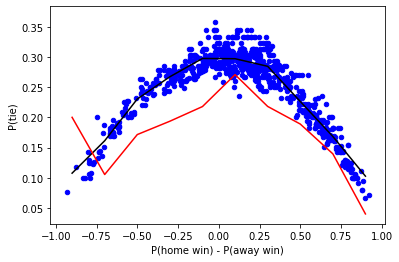

In [9]:
average_bet_tie = [0] * 10
average_bet_tie_normalized = [0] * 10
x = [0] * 10
actual_tie = [0] * 10
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot[(bets_data_pivot['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    bets_data_pivot_array2 = bets_data_pivot[(bets_data_pivot['P(home win)_Normalized - P(away win)_Normalized'] > ((i*0.2)-1)) & (bets_data_pivot['P(home win)_Normalized - P(away win)_Normalized'] <= ((i*0.2)-0.8))]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    average_bet_tie_normalized[i] = bets_data_pivot_array2.sum()['P(tie)_Normalized']/bets_data_pivot_array2.shape[0]
    x[i] = ((i*0.2)-0.9)

bets_data_pivot.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()

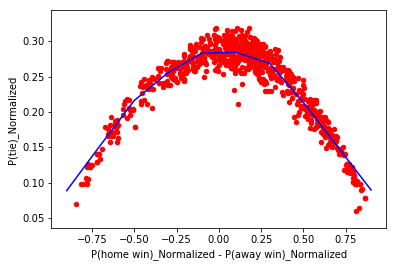

In [15]:
bets_data_pivot.plot(kind='scatter',x='P(home win)_Normalized - P(away win)_Normalized',y='P(tie)_Normalized',color='red')
plt.plot(x, average_bet_tie_normalized, 'b-')
plt.show()

C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


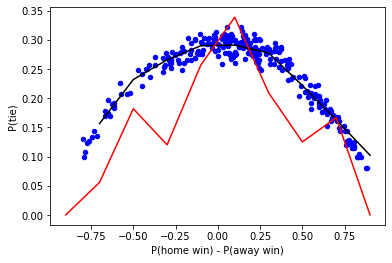

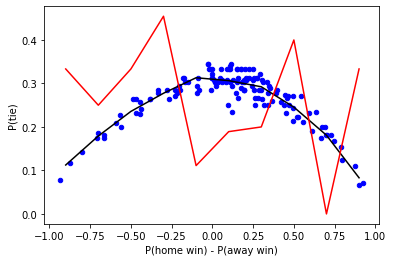

C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


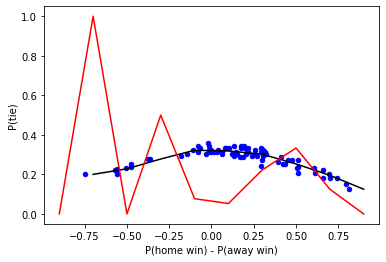

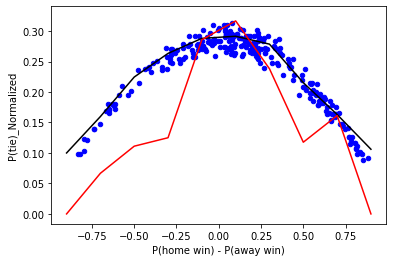

In [10]:
bets_data_pivot_1xbet = bets_data_pivot[bets_data_pivot.odd_bookmakers == '1xBet']
bets_data_pivot_tempobet = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Tempobet']
bets_data_pivot_tipico = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Tipico']
bets_data_pivot_betsson = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Betsson']
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_1xbet[(bets_data_pivot_1xbet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_1xbet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_1xbet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tempobet[(bets_data_pivot_tempobet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tempobet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tempobet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tipico[(bets_data_pivot_tipico['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tipico['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tipico.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_betsson[(bets_data_pivot_betsson['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_betsson['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_betsson.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)_Normalized',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()


# Task 3

In [13]:
goals = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\goals.csv')
goals.head()
booking = pnd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\booking.csv')
booking = booking[booking['match_id'].isin(english_finish_matches['match_id'].values)]
booking.head()

,match_id,time,home_fault,card,away_fault
0,13327,90+3,Can E.,yellow card,NaN
1,13329,29,Holebas J.,yellow card,NaN
2,13329,40,Doucoure A.,yellow card,NaN
3,13331,33,Cabaye Y.,yellow card,NaN
4,13331,50,Puncheon J.,yellow card,NaN


In [14]:
goals.describe()

,match_id
count,11825.000000
mean,146717.666808
std,70994.463443
min,13274.000000
25%,78706.000000
50%,154738.000000
75%,203854.000000
max,317909.000000


In [15]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 5 columns):
match_id       11825 non-null int64
time           11825 non-null object
home_scorer    6744 non-null object
score          11825 non-null object
away_scorer    5045 non-null object
dtypes: int64(1), object(4)
memory usage: 462.0+ KB


In [16]:
booking_filtered = booking[(booking['card'] == 'red card')]
booking_filtered = booking_filtered[((booking_filtered['time']).str)[0:2].astype(int) <= 15]
booking_filtered.head()

,match_id,time,home_fault,card,away_fault
436,13422,15,NaN,red card,Coady C.
5681,83075,15,NaN,red card,Mavropanos K.
11037,186626,4,NaN,red card,Maguire H.
12094,200965,11,Deeney T.,red card,NaN


In [17]:
matches_goals_unfiltered = pnd.merge(goals,english_finish_matches[['match_id','match_hometeam_score','match_awayteam_score']], on='match_id', how='inner')
matches_goals = matches_goals_unfiltered[((matches_goals_unfiltered['time']).str)[0:2].astype(int) == 90]
matches_goals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 5 to 1398
Data columns (total 7 columns):
match_id                65 non-null int64
time                    65 non-null object
home_scorer             33 non-null object
score                   65 non-null object
away_scorer             32 non-null object
match_hometeam_score    65 non-null float64
match_awayteam_score    65 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ KB


In [18]:
matches_goals.sort_values(by=['match_id', 'time'])

,match_id,time,home_scorer,score,away_scorer,match_hometeam_score,match_awayteam_score
57,13278,90+7,Zaha W.,2 - 2,NaN,2.0,2.0
54,13284,90+3,Niasse O.,2 - 4,NaN,2.0,5.0
48,13291,90+5,Batshuayi M.,4 - 2,NaN,4.0,2.0
30,13296,90+2,Cleverley T.,2 - 1,NaN,2.0,1.0
5,13323,90+2,Martial A.,4 - 0,NaN,4.0,0.0
81,55248,90,Baines L.,3 - 2,NaN,3.0,2.0
112,63001,90+2,NaN,0 - 1,Sanchez A.,0.0,1.0
131,63572,90+6,Sterling R.,2 - 1,NaN,2.0,1.0
147,66081,90+2,McArthur J.,2 - 1,NaN,2.0,1.0
159,66509,90+4,NaN,0 - 3,Sako B.,0.0,3.0


In [19]:
match_goals_home = matches_goals[~matches_goals['home_scorer'].isnull() & (matches_goals['match_hometeam_score'] == matches_goals['match_awayteam_score'] + 1)]
match_goals_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 30 to 1390
Data columns (total 7 columns):
match_id                10 non-null int64
time                    10 non-null object
home_scorer             10 non-null object
score                   10 non-null object
away_scorer             0 non-null object
match_hometeam_score    10 non-null float64
match_awayteam_score    10 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 640.0+ bytes


In [20]:
match_goals_away = matches_goals[~matches_goals['away_scorer'].isnull() & (matches_goals['match_hometeam_score'] == matches_goals['match_awayteam_score'] - 1)]
match_goals_away.head()

,match_id,time,home_scorer,score,away_scorer,match_hometeam_score,match_awayteam_score
112,63001,90+2,NaN,0 - 1,Sanchez A.,0.0,1.0
223,67896,90+4,NaN,1 - 2,Klavan R.,1.0,2.0
286,72139,90,NaN,0 - 1,Snodgrass R.,0.0,1.0
468,98608,90+3,NaN,1 - 2,Wilson C.,1.0,2.0
477,98614,90+4,NaN,0 - 1,Gabriel Jesus,0.0,1.0


In [21]:
match_goals_tie = matches_goals[(~matches_goals['away_scorer'].isnull() | ~matches_goals['home_scorer'].isnull() ) & (matches_goals['match_hometeam_score'] == matches_goals['match_awayteam_score'])]
match_goals_tie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 57 to 1348
Data columns (total 7 columns):
match_id                12 non-null int64
time                    12 non-null object
home_scorer             7 non-null object
score                   12 non-null object
away_scorer             5 non-null object
match_hometeam_score    12 non-null float64
match_awayteam_score    12 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 768.0+ bytes


C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


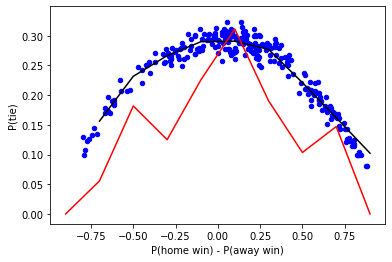

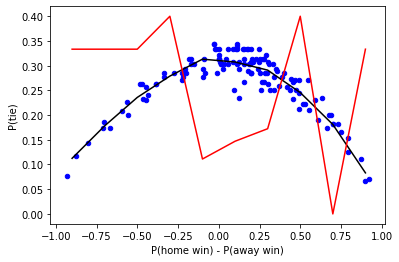

C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


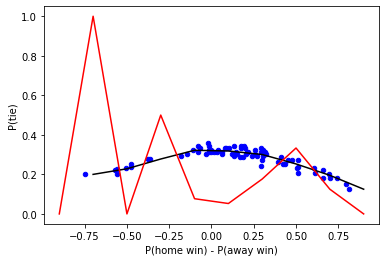

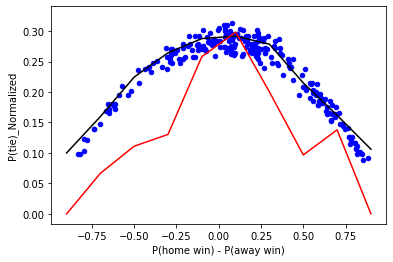

In [22]:
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(booking_filtered['match_id'])]
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(match_goals_home['match_id'])]
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(match_goals_away['match_id'])]
bets_data_pivot = bets_data_pivot[~bets_data_pivot.match_id.isin(match_goals_tie['match_id'])]
bets_data_pivot_1xbet = bets_data_pivot[bets_data_pivot.odd_bookmakers == '1xBet']
bets_data_pivot_tempobet = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Tempobet']
bets_data_pivot_tipico = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Tipico']
bets_data_pivot_betsson = bets_data_pivot[bets_data_pivot.odd_bookmakers == 'Betsson']
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_1xbet[(bets_data_pivot_1xbet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_1xbet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_1xbet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tempobet[(bets_data_pivot_tempobet['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tempobet['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tempobet.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_tipico[(bets_data_pivot_tipico['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_tipico['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_tipico.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()
for i in range(0,10):
    bets_data_pivot_array = bets_data_pivot_betsson[(bets_data_pivot_betsson['P(home win) - P(away win)'] > ((i*0.2)-1)) & (bets_data_pivot_betsson['P(home win) - P(away win)'] <= ((i*0.2)-0.8))]
    average_bet_tie[i] = bets_data_pivot_array.sum()['P(tie)']/bets_data_pivot_array.shape[0]
    bets_data_pivot_array3 =bets_data_pivot_array[bets_data_pivot_array['match_hometeam_score'] == bets_data_pivot_array['match_awayteam_score']]
    try:
        actual_tie[i] = bets_data_pivot_array3.shape[0]/(bets_data_pivot_array.shape[0])
    except:
        actual_tie[i] = 0
bets_data_pivot_betsson.plot(kind='scatter',x='P(home win) - P(away win)',y='P(tie)_Normalized',color='blue')
plt.plot(x, average_bet_tie, 'k-')
plt.plot(x, actual_tie, 'r-')
plt.show()


In [23]:
bets_data_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 755
Data columns (total 17 columns):
match_id                                           719 non-null int64
odd_bookmakers                                     719 non-null object
odd_epoch                                          719 non-null int64
odd_1                                              719 non-null float64
odd_2                                              719 non-null float64
odd_x                                              719 non-null float64
P(home win)                                        719 non-null float64
P(away win)                                        719 non-null float64
P(tie)                                             719 non-null float64
match_hometeam_score                               719 non-null float64
match_awayteam_score                               719 non-null float64
Normalization_Value                                719 non-null float64
P(home win)_Normalized              